## Importing libraries

In [1]:
import pandas as pd
import string
import numpy as np
from PIL import Image
import pathlib
import os
import glob as gb
import matplotlib.pyplot as plt
import random
import matplotlib.image as img
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
SEED = 4

## Setting up path to dataset

In [3]:
PATH =  \
    'C:/Users/yashs/PycharmProjects/InternshipCNN/TCS'

# train, test, pred directory:
trainDIR = PATH + '/seg_train/seg_train'
testDIR = PATH + '/seg_test/seg_test'
predDIR = PATH + '/seg_pred/seg_pred'


print('trainDIR = Training Directory:')
print(trainDIR)
print()
print('testDIR = Test Directory:')
print(testDIR)
print()
print('predDIR = Prediction Directory:')
print(predDIR)

trainDIR = Training Directory:
C:/Users/yashs/PycharmProjects/InternshipCNN/TCS/seg_train/seg_train

testDIR = Test Directory:
C:/Users/yashs/PycharmProjects/InternshipCNN/TCS/seg_test/seg_test

predDIR = Prediction Directory:
C:/Users/yashs/PycharmProjects/InternshipCNN/TCS/seg_pred/seg_pred


### Distribution of Training data

In [4]:
# Distribution of Training Data

print('Training Data Directory:')
print(trainDIR)
print('-'*70)
for folder in os.listdir(trainDIR):
    files=gb.glob(pathname=str(trainDIR + '/' + folder +'/*.jpg'))
    print(f'{len(files):4} images are founnd in {folder} folder.')

Training Data Directory:
C:/Users/yashs/PycharmProjects/InternshipCNN/TCS/seg_train/seg_train
----------------------------------------------------------------------
2191 images are founnd in buildings folder.
2271 images are founnd in forest folder.
2404 images are founnd in glacier folder.
2512 images are founnd in mountain folder.
2274 images are founnd in sea folder.
2382 images are founnd in street folder.


### Distribution of Test data

In [5]:
# Distribution of Test Data

print('Test Data Directory:')
print(testDIR)
print('-'*70)
for folder in os.listdir(testDIR):
    files=gb.glob(pathname=str(testDIR + '/' + folder +'/*.jpg'))
    print(f'{len(files):4} images are founnd in {folder} folder.')

Test Data Directory:
C:/Users/yashs/PycharmProjects/InternshipCNN/TCS/seg_test/seg_test
----------------------------------------------------------------------
 437 images are founnd in buildings folder.
 474 images are founnd in forest folder.
 553 images are founnd in glacier folder.
 525 images are founnd in mountain folder.
 510 images are founnd in sea folder.
 501 images are founnd in street folder.


### Distribution of Prediction data

In [6]:
# Distribution of Prediction Data

print('Prediction Data Directory:')
print(predDIR)
print('-'*70)
files= gb.glob(pathname=str(predDIR + "/*.jpg"))
print(f"{len(files)} images are found in predict data.")

Prediction Data Directory:
C:/Users/yashs/PycharmProjects/InternshipCNN/TCS/seg_pred/seg_pred
----------------------------------------------------------------------
7301 images are found in predict data.


## Data Preprocessing

### Resize and Define Batch Size

In [7]:
BATCH_SIZE = 16
IMG_HEIGHT = 64
IMG_WIDTH = 64

### Training data preprocessing

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=trainDIR,
    seed=SEED,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

Found 14034 files belonging to 6 classes.


### Test data preprocessing

In [9]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=testDIR,
    seed=SEED,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

Found 3000 files belonging to 6 classes.


### Prediction data preprocessing

In [11]:
pred_ds = tf.keras.preprocessing.image_dataset_from_directory(
    label_mode=None,
    directory=PATH + '/seg_pred',
    image_size=(IMG_HEIGHT, IMG_WIDTH))

Found 7301 files belonging to 1 classes.


###  Label classes

In [12]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


### Plotting sample of train dataset

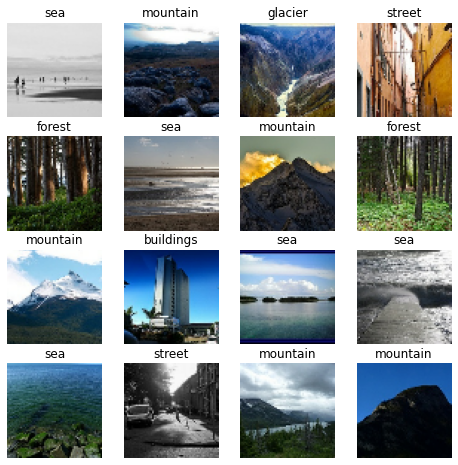

In [14]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1): 
    for i in range(BATCH_SIZE): #plot first 9 images
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

### Building CNN model1

In [15]:
num_classes = len(class_names) 

CNNmodel1 = tf.keras.models.Sequential([
  #first we need to rescale the images  to 0 1and 1
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, 
                                                       input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  
  tf.keras.layers.Conv2D(32, kernel_size=(4,4), activation='relu'),
  tf.keras.layers.MaxPooling2D(),  

  tf.keras.layers.Conv2D(64, kernel_size=(4,4), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
#  tf.keras.layers.Dropout(0.25),
    
  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128, activation='relu'),
#  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Dense(num_classes)
])

### Compiling CNN model1

In [16]:
# Compile the model

CNNmodel1.compile(optimizer="adam",
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=["accuracy"])

### Plotting CNN model1 structure 

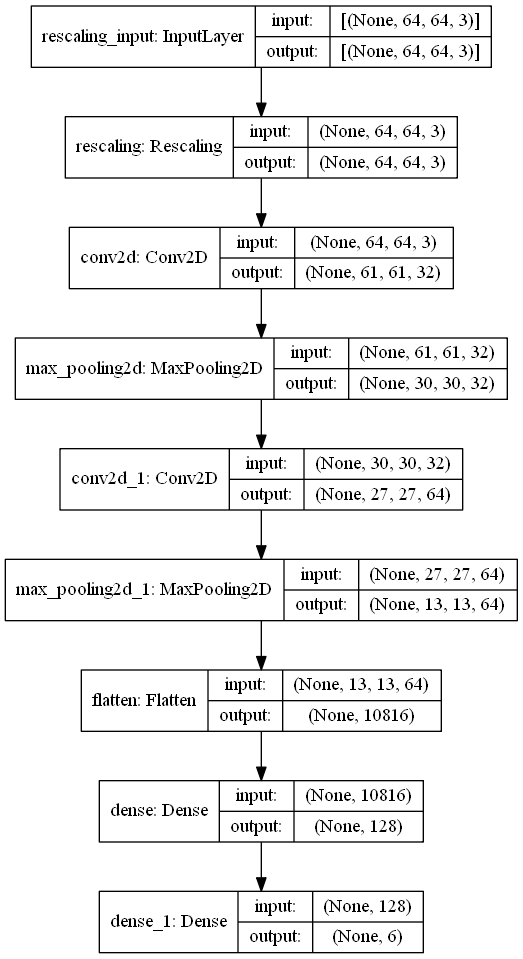

In [17]:
# Plot the model

tf.keras.utils.plot_model(CNNmodel1,
                          show_shapes=True,
                          show_layer_names=True, 
                          rankdir='TB', expand_nested=False)

### Training CNN model1

In [18]:
# Train the model:

ES=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

CNNhistory1 = CNNmodel1.fit(train_ds,
                            validation_data=test_ds,
                            epochs=20,
                            verbose=1,
                            callbacks = [ES])

Epoch 1/20
878/878 [==============================] - 9s 7ms/step - loss: 0.9703 - accuracy: 0.6189 - val_loss: 0.9531 - val_accuracy: 0.6330
Epoch 2/20
878/878 [==============================] - 6s 7ms/step - loss: 0.6787 - accuracy: 0.7512 - val_loss: 0.6767 - val_accuracy: 0.7457
Epoch 3/20
878/878 [==============================] - 6s 7ms/step - loss: 0.5301 - accuracy: 0.8079 - val_loss: 0.6618 - val_accuracy: 0.7623
Epoch 4/20
878/878 [==============================] - 6s 7ms/step - loss: 0.4095 - accuracy: 0.8500 - val_loss: 0.7112 - val_accuracy: 0.7533
Epoch 5/20
878/878 [==============================] - 6s 7ms/step - loss: 0.3032 - accuracy: 0.8913 - val_loss: 0.7753 - val_accuracy: 0.7583
Epoch 6/20
878/878 [==============================] - 6s 7ms/step - loss: 0.2065 - accuracy: 0.9257 - val_loss: 0.9520 - val_accuracy: 0.7437
Epoch 7/20
878/878 [==============================] - 6s 7ms/step - loss: 0.1491 - accuracy: 0.9483 - val_loss: 1.0956 - val_accuracy: 0.7537
Epoch 

### Evaluating CNN model1

In [19]:
test_loss1, test_acc1 = CNNmodel1.evaluate(test_ds)

print('Test Loss: {}'.format(test_loss1))
print('Test Accuracy: {}'.format(test_acc1))

188/188 [==============================] - 1s 4ms/step - loss: 1.9248 - accuracy: 0.7377
Test Loss: 1.9247822761535645
Test Accuracy: 0.737666666507721


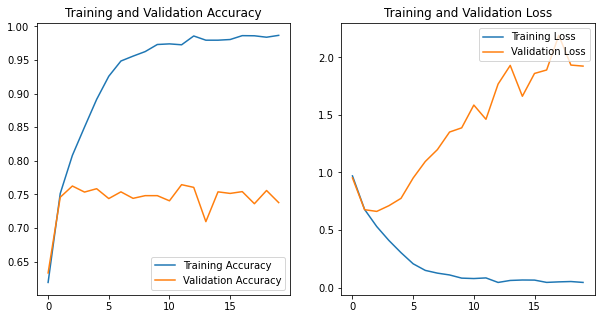

In [20]:
acc = CNNhistory1.history['accuracy']
val_acc = CNNhistory1.history['val_accuracy']

loss = CNNhistory1.history['loss']
val_loss = CNNhistory1.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Using Data Augmentation Layer

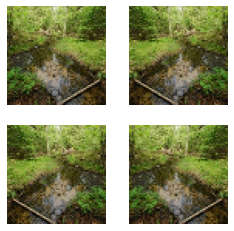

In [21]:
# Define the data_augmentation layer:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
])

# Visualize a few augmented examples:
plt.figure(figsize=(4,4))
for images, _ in train_ds.take(1):
    for i in range(4):
        augmented_images = data_augmentation(images)
        ax=plt.subplot(2,2,i+1)
        plt.imshow(augmented_images[1].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

### Building CNN model2 with data augmentation

In [22]:
CNNmodel2 = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, kernel_size=(4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(num_classes)
])

# Compile the model
CNNmodel2.compile(optimizer="adam",
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=["accuracy"])

### Plotting CNN model2  structure 

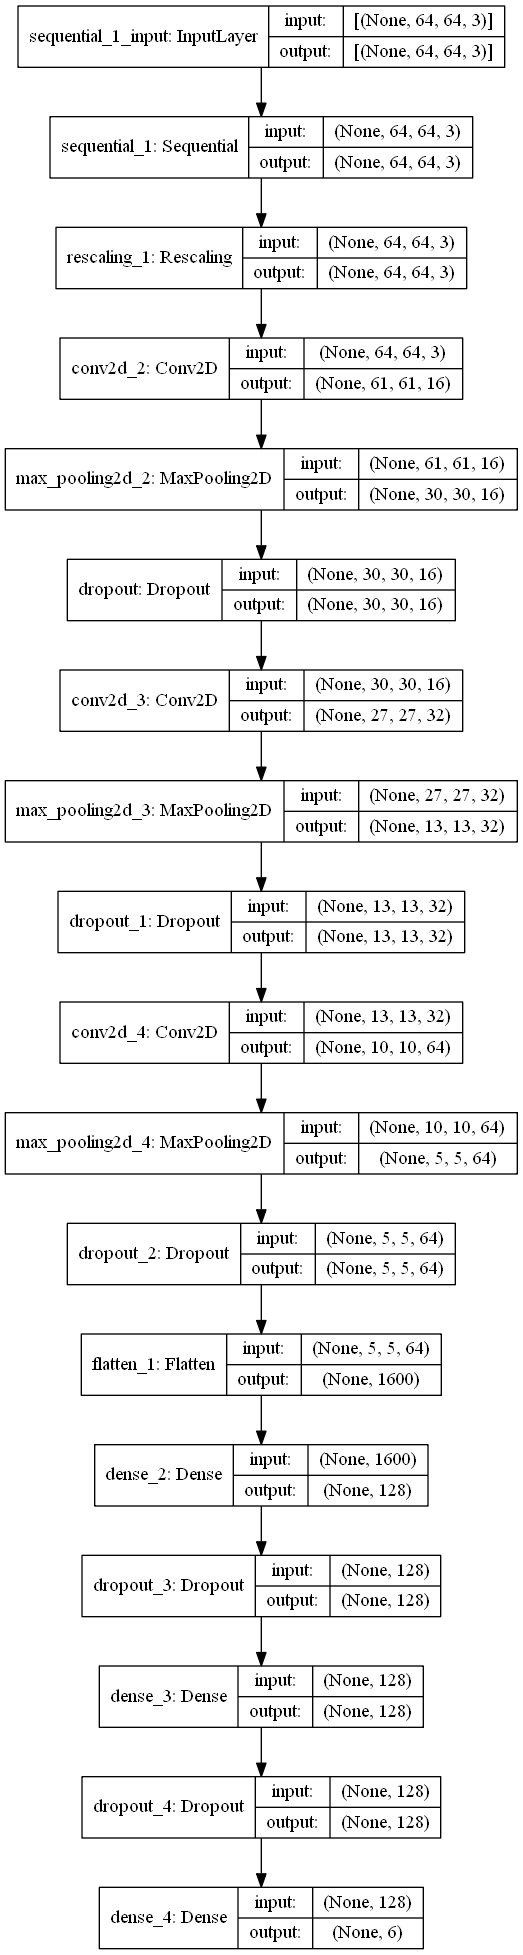

In [23]:
tf.keras.utils.plot_model(CNNmodel2,
                          show_shapes=True,
                          show_layer_names=True, 
                          rankdir='TB', expand_nested=False)

### Training CNN model2

In [24]:
CNNhistory2 = CNNmodel2.fit(train_ds,
                            validation_data=test_ds,
                            epochs=20,
                            verbose=1,
                            callbacks = [ES])

Epoch 1/20
878/878 [==============================] - 8s 8ms/step - loss: 1.1880 - accuracy: 0.5193 - val_loss: 0.9482 - val_accuracy: 0.6260
Epoch 2/20
878/878 [==============================] - 7s 8ms/step - loss: 0.9271 - accuracy: 0.6418 - val_loss: 0.8453 - val_accuracy: 0.6787
Epoch 3/20
878/878 [==============================] - 7s 8ms/step - loss: 0.8170 - accuracy: 0.6948 - val_loss: 0.7510 - val_accuracy: 0.7257
Epoch 4/20
878/878 [==============================] - 7s 8ms/step - loss: 0.7451 - accuracy: 0.7274 - val_loss: 0.6559 - val_accuracy: 0.7767
Epoch 5/20
878/878 [==============================] - 7s 8ms/step - loss: 0.6929 - accuracy: 0.7497 - val_loss: 0.6584 - val_accuracy: 0.7617
Epoch 6/20
878/878 [==============================] - 7s 8ms/step - loss: 0.6571 - accuracy: 0.7617 - val_loss: 0.6360 - val_accuracy: 0.7723
Epoch 7/20
878/878 [==============================] - 7s 8ms/step - loss: 0.6220 - accuracy: 0.7787 - val_loss: 0.5587 - val_accuracy: 0.8023
Epoch 

### Evaluating CNN model2

In [25]:
test_loss2, test_acc2 = CNNmodel2.evaluate(test_ds)

print('Test Loss: {}'.format(test_loss2))
print('Test Accuracy: {}'.format(test_acc2))

188/188 [==============================] - 1s 4ms/step - loss: 0.5520 - accuracy: 0.8080
Test Loss: 0.5520302057266235
Test Accuracy: 0.8080000281333923


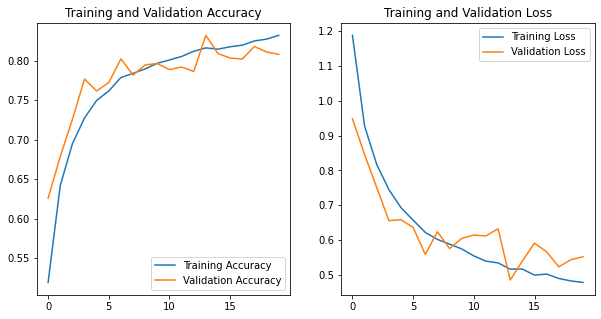

In [26]:
acc = CNNhistory2.history['accuracy']
val_acc = CNNhistory2.history['val_accuracy']

loss = CNNhistory2.history['loss']
val_loss = CNNhistory2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model3 using Transfer Learning (MobileNet_V2)

In [27]:
# Preprocesses a tensor or Numpy array encoding a batch of images.

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [28]:
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH) + (3,)
# Specify the pre-trained model
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False)

In [29]:
#take out one batch of size of 9 images
image_batch, label_batch = next(iter(train_ds))
#pass these images to the pre-trained model WITHOUT the top include_top=False
feature_batch = base_model(image_batch)
print(feature_batch.shape)
#it has 1280 channels in the pretrained model
# this is the inputs (16,2,2, 1280) before flatten layer, 
# to convert it to 1D, then pass it to a classification algorithm

(16, 2, 2, 1280)


In [30]:
# Freeze the convolutional base
base_model.trainable = False

In [31]:
# Add a classification head
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(16, 1280)


In [32]:
# Add prediction layer
prediction_layer = tf.keras.layers.Dense(num_classes) #activation = identity, the default in Dense () function.
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)
# we have 16 images in each batch; 6 categories to predict

(16, 6)


### Building CNN model3

In [33]:
# Build the transfer learning model uisng Functional API
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = prediction_layer(x)
TransModel = tf.keras.Model(inputs, outputs)

# Compile Model
base_learning_rate = 0.0001
TransModel.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #BinaryCrisssentropy for binary classification,since the last layer has one neuron with activation = identity (the default)
                   metrics=['accuracy'])

C:\Users\yashs\.conda\envs\gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


### Plotting CNN model3 structure 

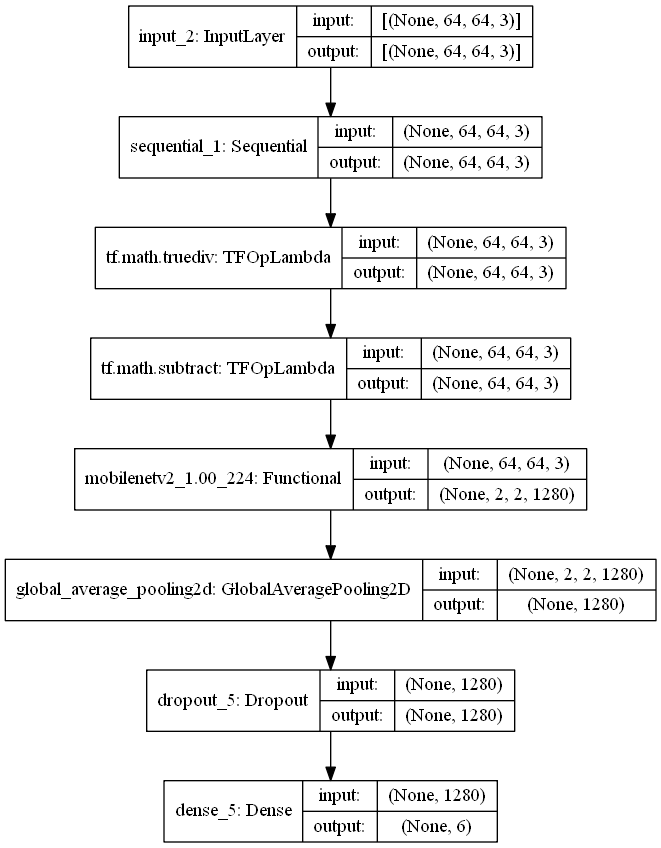

In [34]:
tf.keras.utils.plot_model(TransModel,
                          show_shapes=True,
                          show_layer_names=True, 
                          rankdir='TB', expand_nested=False)

### Training CNN model3

In [35]:
# Train the model
loss0, accuracy0 = TransModel.evaluate(test_ds)

print()
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

188/188 [==============================] - 4s 14ms/step - loss: 2.4188 - accuracy: 0.1857

initial loss: 2.42
initial accuracy: 0.19


In [36]:
EPOCHS = 10

#training model(freeze other layers, only train the top layer/classifier)
historyTM = TransModel.fit(train_ds,
                           epochs=EPOCHS,
                           validation_data=test_ds)

Epoch 1/10
878/878 [==============================] - 15s 15ms/step - loss: 1.2855 - accuracy: 0.5581 - val_loss: 0.6950 - val_accuracy: 0.7530
Epoch 2/10
878/878 [==============================] - 13s 15ms/step - loss: 0.7843 - accuracy: 0.7315 - val_loss: 0.5893 - val_accuracy: 0.7913cy
Epoch 3/10
878/878 [==============================] - 13s 15ms/step - loss: 0.6794 - accuracy: 0.7677 - val_loss: 0.5473 - val_accuracy: 0.8110
Epoch 4/10
878/878 [==============================] - 13s 15ms/step - loss: 0.6128 - accuracy: 0.7860 - val_loss: 0.5217 - val_accuracy: 0.8200
Epoch 5/10
878/878 [==============================] - 13s 15ms/step - loss: 0.5830 - accuracy: 0.7966 - val_loss: 0.5037 - val_accuracy: 0.8250
Epoch 6/10
878/878 [==============================] - 13s 15ms/step - loss: 0.5440 - accuracy: 0.8076 - val_loss: 0.4919 - val_accuracy: 0.8273
Epoch 7/10
878/878 [==============================] - 13s 15ms/step - loss: 0.5301 - accuracy: 0.8111 - val_loss: 0.4822 - val_accurac

### Evaluating CNN model3 

In [37]:
lossTM, accuracyTM = TransModel.evaluate(test_ds)

print()
print("initial loss: {:.2f}".format(lossTM))
print("initial accuracy: {:.2f}".format(accuracyTM))

188/188 [==============================] - 2s 12ms/step - loss: 0.4631 - accuracy: 0.8357

initial loss: 0.46
initial accuracy: 0.84


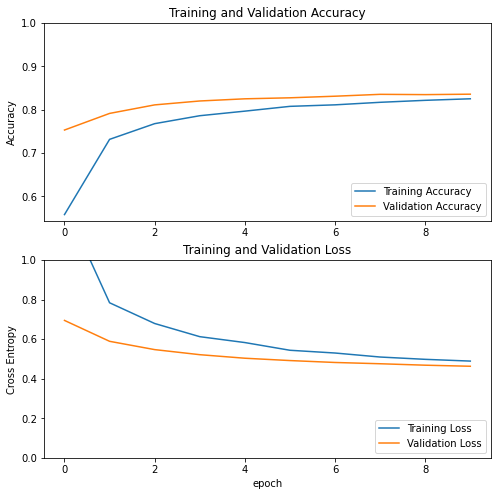

In [38]:
# Plot the learning curves
acc = historyTM.history['accuracy']
val_acc = historyTM.history['val_accuracy']

loss = historyTM.history['loss']
val_loss = historyTM.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Fine Tuning the Transfer Model

In [39]:
# Unfreeze the top layers of the model
base_model.trainable = True

# See how many layers are in the base model
print('Number of layers in the base model:', len(base_model.layers))

FINE_TUNE_AT = 100
for layer in base_model.layers[:FINE_TUNE_AT]:
    layer.trainable = False

Number of layers in the base model: 154


In [40]:
# Compile 
TransModel.compile(
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate/10.),
                metrics=['accuracy']
)

TransModel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64, 64, 3)         0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 64, 64, 3)         0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 64, 64, 3)         0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 2, 2, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1280)              0     

In [41]:
len(TransModel.trainable_variables)

56

In [42]:
FINE_TUNE_EPOCHS = 10
TOTAL_EPOCHS = EPOCHS + FINE_TUNE_EPOCHS

historyFT = TransModel.fit(train_ds,
                           epochs = TOTAL_EPOCHS,
                           initial_epoch=historyTM.epoch[-1],
                           validation_data=test_ds)

Epoch 10/20
878/878 [==============================] - 22s 23ms/step - loss: 0.4430 - accuracy: 0.8413 - val_loss: 0.3878 - val_accuracy: 0.8557
Epoch 11/20
878/878 [==============================] - 19s 22ms/step - loss: 0.3649 - accuracy: 0.8691 - val_loss: 0.3685 - val_accuracy: 0.8673
Epoch 12/20
878/878 [==============================] - 19s 22ms/step - loss: 0.3124 - accuracy: 0.8875 - val_loss: 0.3492 - val_accuracy: 0.8797
Epoch 13/20
878/878 [==============================] - 19s 22ms/step - loss: 0.2810 - accuracy: 0.8958 - val_loss: 0.3360 - val_accuracy: 0.8830
Epoch 14/20
878/878 [==============================] - 19s 22ms/step - loss: 0.2551 - accuracy: 0.9047 - val_loss: 0.3188 - val_accuracy: 0.8827
Epoch 15/20
878/878 [==============================] - 19s 22ms/step - loss: 0.2253 - accuracy: 0.9162 - val_loss: 0.3224 - val_accuracy: 0.8873
Epoch 16/20
878/878 [==============================] - 20s 22ms/step - loss: 0.2076 - accuracy: 0.9218 - val_loss: 0.3128 - val_ac

### Evaluating model3 

In [43]:
lossFT, accuracyFT = TransModel.evaluate(test_ds)

print()
print("initial loss: {:.2f}".format(lossFT))
print("initial accuracy: {:.2f}".format(accuracyFT))

188/188 [==============================] - 2s 12ms/step - loss: 0.3224 - accuracy: 0.8937

initial loss: 0.32
initial accuracy: 0.89


In [44]:
# acc holds the acc of the training epochs 1:10
# history_fine.history['accuracy'] epcosh 11:20
acc += historyFT.history['accuracy']
val_acc += historyFT.history['val_accuracy']

loss += historyFT.history['loss']
val_loss += historyFT.history['val_loss']

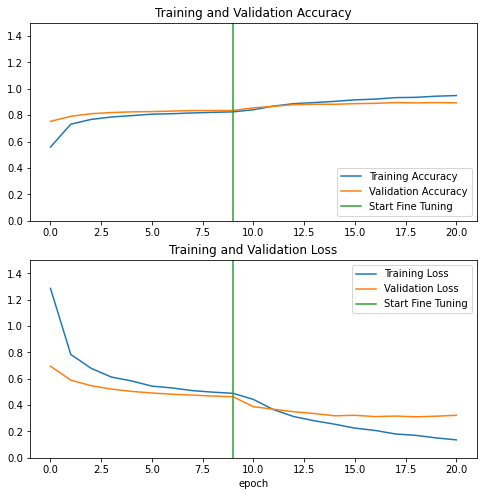

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0., 1.5])
plt.plot([EPOCHS-1,EPOCHS-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.5])
plt.plot([EPOCHS-1,EPOCHS-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


## Making Prediction with Transfer Model

In [46]:
Best_Model = TransModel
Best_Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64, 64, 3)         0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 64, 64, 3)         0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 64, 64, 3)         0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 2, 2, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1280)              0     

In [47]:
all_pred_paths = gb.glob(predDIR + '/*.jpg')

In [48]:
def classify_img(img_path):
    '''
    input:path of the image to be classified
    output:image, predicted label of the image
    '''
    proc_img = tf.keras.preprocessing.image.load_img(path=img_path , 
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH))
    input_arr = tf.keras.preprocessing.image.img_to_array(proc_img)
    input_arr = np.array([input_arr])
    y_pred = Best_Model.predict(input_arr)
    label = class_names[np.argmax(y_pred)]
    
    image = img.imread(img_path)
    disp = plt.imshow(image)
    plt.title(label)
    plt.show()
    return disp, label

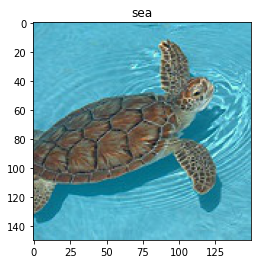

(<matplotlib.image.AxesImage at 0x282b7548d60>, 'sea')

In [49]:
IMAGE_PATH = predDIR + '/423.jpg'

classify_img(IMAGE_PATH)